In [111]:
import numpy as np 
from calcbsimpvol import calcbsimpvol
import QuantLib as ql
import math
import numpy as np
import pandas as pd

# 1년을 몇일로 볼것인가? 한국은 ACT 즉 실제 그 해의 일수 365로 고정한 것을 씀.
day_count = ql.Actual365Fixed() #Actual/365
calculation_date = ql.Date(29, 5, 2020)

K=[]
T=[]
S=[]
df = pd.read_csv("20200529 2-05pm call.csv")
for i in range(len(df)):
    if df['종목'][i][-9]=='0':
            if df['종목'][i][-7]=='6':
                expiry = ql.Date(11,6,2020)
                maturity = round(day_count.yearFraction(calculation_date,expiry),4)
                T.append(maturity)
                K.append(float(df['종목'][i][-5:]))
                S.append(float(df['현재가'][i]))

In [112]:
print(T)
print(K)
print(S)

[0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356]
[160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 182.5, 185.0, 187.5, 190.0, 192.5, 195.0, 197.5, 200.0, 202.5, 205.0, 207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5, 240.0, 242.5, 245.0, 247.5, 250.0, 252.5, 255.0, 257.5, 260.0, 262.5, 265.0, 267.5, 270.0, 272

In [113]:
call_implied_volatility=[]
for i in range(len(T)):
    s = np.asarray(267.65) # Underlying Price : Kospi200지수 5.29 2:04pm
    k = np.asarray([K[i]]) # Strike Price 
    tau = np.asarray([T[i]]) # Time to Maturity 
    r = np.asarray(0.81)  # CD91일물 금리 2020.5.29일 기준
    q = np.asarray(2.29) # Dividend Rate 2020.5.28 Kospi200 지수 배당수익률 추이
    cp = np.asarray(1) # Option Type 
    P = np.asarray([S[i]]) # Market Price
    
    imp_vol = calcbsimpvol(dict(cp=cp, P=P, S=s, K=k, tau=tau, r=r, q=q)) 
    if imp_vol[0][0]>=1:
        imp_vol[0][0]=nan    
    call_implied_volatility.append(imp_vol[0][0])
print(call_implied_volatility)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.9511329646497354, 0.9756335435325436, 0.876275155606838, 0.8435408290049513, 0.7649009775690883, 0.7209099940097967, 0.6811085116347884, 0.6283506769483651, 0.5793534692180927, 0.5341412954787116, 0.49355949858960896, 0.45783174936246, 0.42744636703191313, 0.4006162145150726, 0.3791457189227127, 0.3600193213401, 0.34278565834338404, 0.3298095250715711, 0.3213774143033221, 0.310185801450511, 0.3156840806022755, 0.31700900610925364, 0.309930169058995, 0.3237602659148386, 0.3374171453042978, 0.3509069255392467, 0.3642352450612498, 0.3774073246941113, 0.3904280190614418, 0.4033018594669049, 0.41603308995840665, 0.4286256978988671, 0.4410834400687224, 0.45340986510477094, 0.46560833290809345, 0.4776820315295177, 0.48963399193986246, 0.501467101015941, 0.5131841130106847, 0.5247876597325996, 0.5362802596136382, 0.54766432

In [114]:
import numpy as np 
from calcbsimpvol import calcbsimpvol
import QuantLib as ql
import math
import numpy as np
import pandas as pd

# 1년을 몇일로 볼것인가? 한국은 ACT 즉 실제 그 해의 일수 365로 고정한 것을 씀.
day_count = ql.Actual365Fixed() #Actual/365
calculation_date = ql.Date(29, 5, 2020)

K=[]
T=[]
S=[]
df = pd.read_csv("20200529 2-05pm put.csv")
for i in range(len(df)):
    if df['종목'][i][-9]=='0':
            if df['종목'][i][-7]=='6':
                expiry = ql.Date(11,6,2020)
                maturity = round(day_count.yearFraction(calculation_date,expiry),4)
                T.append(maturity)
                K.append(float(df['종목'][i][-5:]))
                S.append(float(df['현재가'][i]))

In [115]:
print(T)
print(K)
print(S)

[0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356, 0.0356]
[160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 182.5, 185.0, 187.5, 190.0, 192.5, 195.0, 197.5, 200.0, 202.5, 205.0, 207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5, 240.0, 242.5, 245.0, 247.5, 250.0, 252.5, 255.0, 257.5, 260.0, 262.5, 265.0, 267.5, 270.0, 272

In [116]:
put_implied_volatility=[]
for i in range(len(T)):
    s = np.asarray(267.65) # Underlying Price : Kospi200지수 5.29 2:04pm
    k = np.asarray([K[i]]) # Strike Price 
    tau = np.asarray([T[i]]) # Time to Maturity 
    r = np.asarray(0.81)  # CD91일물 금리 2020.5.29일 기준
    q = np.asarray(2.29) # Dividend Rate 2020.5.28 Kospi200 지수 배당수익률 추이 
    cp = np.asarray(-1) # Option Type 
    P = np.asarray([S[i]]) # Market Price
    
    imp_vol = calcbsimpvol(dict(cp=cp, P=P, S=s, K=k, tau=tau, r=r, q=q))     
    put_implied_volatility.append(imp_vol[0][0])
print(put_implied_volatility)

[0.8062465457561576, 0.7809140522860207, 0.7559363467501872, 0.7313009202202553, 0.7069957302600818, 0.6830091638533731, 0.6593300018187074, 0.6775598120570121, 0.6128507775933016, 0.6290229808569403, 0.6304108922089511, 0.6059875225337, 0.6001426844852903, 0.5755967788551435, 0.5654943286151822, 0.5409096203765595, 0.527962642970322, 0.5131373074800618, 0.4968603353718614, 0.4794169105372893, 0.46100638075967476, 0.44737748876121436, 0.43171584879097835, 0.410221089703527, 0.39209257018131116, 0.37602900322128013, 0.35521620177149243, 0.3360408878973271, 0.3176374491928234, 0.2992836408216402, 0.28040700686440756, 0.257714365399985, 0.2368799605993276, 0.21315839630788666, 0.19016708796476542, 0.1652250317955728, 0.1366244055961782, 0.10193463785972263, 0.05164867992175101, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

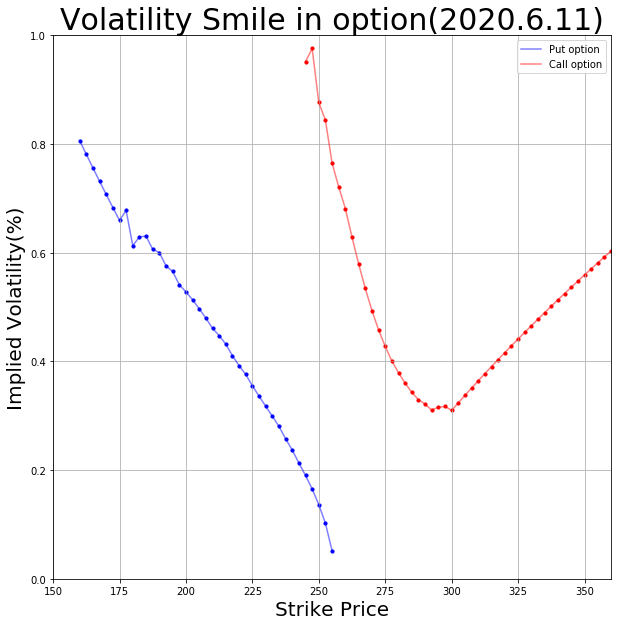

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10)) 
plt.scatter(K,put_implied_volatility,c = 'b', s = 10)
plt.plot(K,put_implied_volatility, c = 'b', alpha = 0.5)
plt.scatter(K,call_implied_volatility,c = 'r', s = 10)
plt.plot(K,call_implied_volatility, c = 'r', alpha = 0.5)
plt.grid()
plt.legend(['Put option', 'Call option'])
plt.xlim([150,360])
plt.ylim([0,1])
plt.xlabel('Strike Price', color = 'black', fontsize = 20)
plt.ylabel('Implied Volatility(%)', color = 'black', fontsize = 20)
plt.title('Volatility Smile in option(2020.6.11)', fontsize = 30)
plt.show()